In [24]:
# import libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE



In [2]:
# read the data
data = pd.read_csv('customer_churn.csv')

data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
display(data.columns)

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [4]:
# target and features
X = data[['tenure','SeniorCitizen','MonthlyCharges']]
y = data ['Churn']

display(X.head)
display(y.head)

<bound method NDFrame.head of       tenure  SeniorCitizen  MonthlyCharges
0          1              0           29.85
1         34              0           56.95
2          2              0           53.85
3         45              0           42.30
4          2              0           70.70
...      ...            ...             ...
7038      24              0           84.80
7039      72              0          103.20
7040      11              0           29.60
7041       4              1           74.40
7042      66              0          105.65

[7043 rows x 3 columns]>

<bound method NDFrame.head of 0        No
1        No
2       Yes
3        No
4       Yes
       ... 
7038     No
7039     No
7040     No
7041    Yes
7042     No
Name: Churn, Length: 7043, dtype: object>

In [8]:
# spli the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.275, random_state=33)

# create the model
mdl = LogisticRegression()

# fit
mdl.fit(X_train, y_train)

LogisticRegression()

Accuracy: 78.58%
              precision    recall  f1-score   support

          No       0.81      0.92      0.86      1410
         Yes       0.66      0.43      0.52       527

    accuracy                           0.79      1937
   macro avg       0.74      0.68      0.69      1937
weighted avg       0.77      0.79      0.77      1937



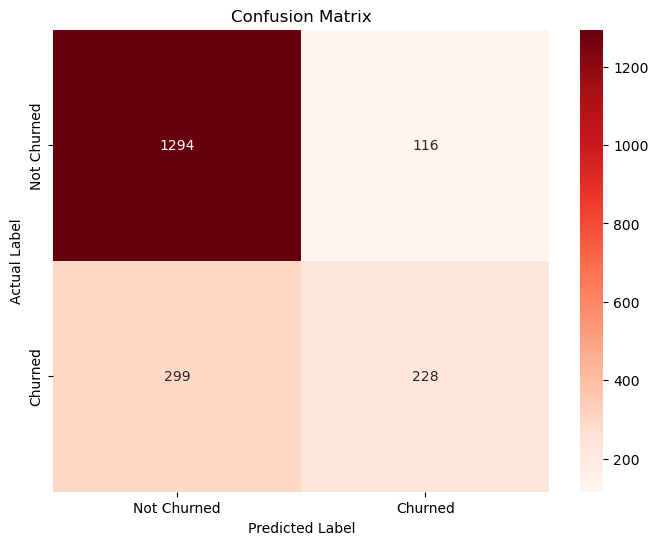

In [27]:
# model evaluation

# predict for the test set 
y_pred = mdl.predict(X_test)

# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

# show the scores
print(classification_report(y_test, y_pred))


# show the confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Reds", xticklabels=["Not Churned", "Churned"], yticklabels=["Not Churned", "Churned"])
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix')
plt.show()

'Churn' suffers from class imbalance (we see below that the % of 'Nos' is 75%) which could also be a contributing factor to the accuracy.

This simple model could be giving us accurate results if the features are good predictors for the target variable.



In [32]:
# countthe number of yes (and nos) for chrun
yes_count = data['Churn'].value_counts()['Yes']
no_count = data['Churn'].value_counts()['No']

# calc percentage of each
yes_percentage = yes_count / (yes_count + no_count) * 100

print('Percentage of yes values:', yes_percentage)

Percentage of yes values: 26.536987079369588


In [25]:
# use SMOTE to see in the accuracy is improved

# fit
smote = SMOTE()
X_sm, y_sm = smote.fit_resample(X, y)

# train
X_train_sm, X_test_sm, y_train_sm, y_test_sm = train_test_split(X_sm, y_sm, test_size=0.275, random_state=33)

# model
mdl_sm = LogisticRegression()
mdl_sm.fit(X_train_sm, y_train_sm)

LogisticRegression()

In [30]:
y_pred_sm = mdl_sm.predict(X_test_sm)

accuracy_sm = accuracy_score(y_test_sm, y_pred_sm)
print(f"Accuracy with SMOTE: {accuracy_sm * 100:.2f}%")

#SMOTE results
print(classification_report(y_test_sm, y_pred_sm)) 


Accuracy with SMOTE: 74.14%
              precision    recall  f1-score   support

          No       0.73      0.75      0.74      1403
         Yes       0.75      0.74      0.74      1443

    accuracy                           0.74      2846
   macro avg       0.74      0.74      0.74      2846
weighted avg       0.74      0.74      0.74      2846



In [31]:
print(classification_report(y_test, y_pred)) #oringal results

              precision    recall  f1-score   support

          No       0.81      0.92      0.86      1410
         Yes       0.66      0.43      0.52       527

    accuracy                           0.79      1937
   macro avg       0.74      0.68      0.69      1937
weighted avg       0.77      0.79      0.77      1937



accuracy is not improved but recall for the minority class has improved markedly. Also looking at the new confusion matrix (below) we see that the number of TNs has markedly increased which could be vitaly important for the bussiness case as predicting which customers might Churn would be very important (more inportant than FNs in this case).

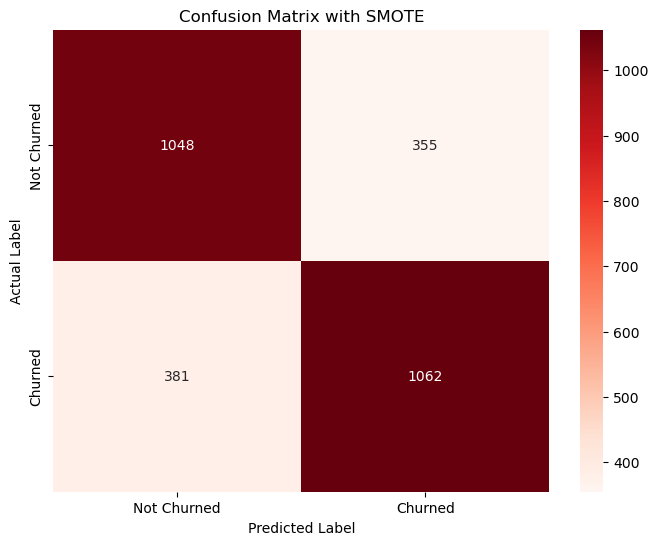

In [33]:
# show confusion matrix for SMOTE

cm_sm = confusion_matrix(y_test_sm, y_pred_sm)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_sm, annot=True, fmt="d", cmap="Reds", xticklabels=["Not Churned", "Churned"], yticklabels=["Not Churned", "Churned"])
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix with SMOTE')
plt.show()